# Simulate overfocused data

This notebook generates a file `fourdstem_overfocused.npy` with a dataset that coarsely simulates the pinhole camera projection in strongly over- or underfocused 4D STEM. Underfocused data is generated if the specified overfocus is negative.

This dataset can then be used to test the interactive adjustment routine in the `stem_overfocus.ipynb` notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from microscope_calibration.util.stem_overfocus_sim import smiley, project

## Set parameters for simulation

The interactive adjustment should then reach equivalent parameters.

In [2]:
size = 64

sim_params = {
    'overfocus': 0.001,  # m
    'scan_pixel_size': 0.000001,  # m
    'camera_length': 0.15,  # m
    'detector_pixel_size': 0.000050,  # m
    'scan_rotation': 37,
    'flip_y': False,
    'cy': size//2,
    'cx': size//2,
}

## Generate a test object

This is a comic-like face with low symmetry to make it easy for humans to identify the orientation.

In [3]:
obj = smiley(size)

## Show the test object

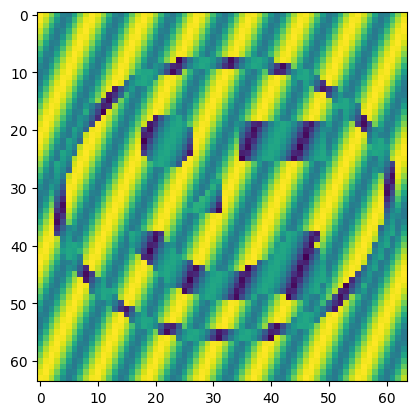

In [4]:
fig, axes = plt.subplots()
axes.imshow(obj)

## Prject to simulated 4D STEM dataset using a reference ray tracing implementation

This uses a simple model to trace the rays from the pixels of a supposed detector through the object to the supposed focus point above or below the specimen as a function of scan position. It serves as a reference for the more complex TEMGYM Basic implementation.

In [5]:
fourdstem_overfocused = project(obj, detector_shape=(size, size), scan_shape=(size, size), sim_params=sim_params)

## Show a single simulated detector frame at the center of the scan

Note how this is a magnified and rotated image containing the "nose".

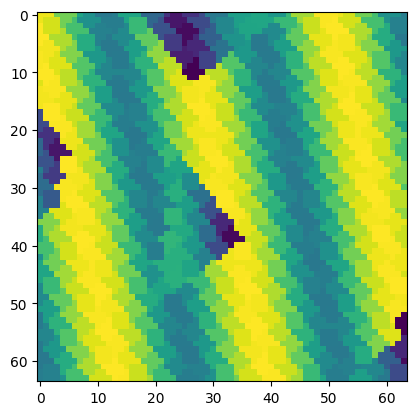

In [6]:
fig, axes = plt.subplots()
axes.imshow(fourdstem_overfocused[size//2, size//2, :, :])

## Show the trace of the central detector pixel

This plots the value of the pixel at the center of the simulated detector as a function of scan position. This reproduces the simulated object.

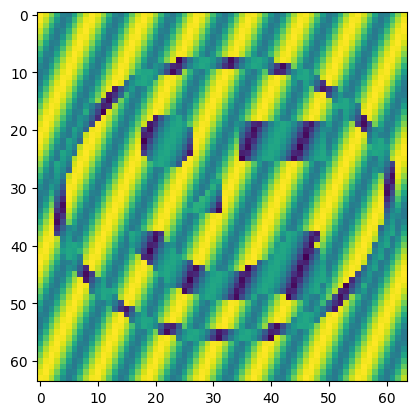

In [7]:
fig, axes = plt.subplots()
axes.imshow(fourdstem_overfocused[:, :, size//2, size//2])

## Save to disk

This file can then be opened in the `stem_overfocus.ipynb` notebook.

In [8]:
np.save("fourdstem_overfocused.npy", fourdstem_overfocused)